# Dataset Sampling

The aim of this notebook is to provide information about features sampling in order to determine which response features are more suitable for the project.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

custom_style = {"grid.color": "black", "grid.linestyle": ":", "grid.linewidth": 0.3, "axes.edgecolor": "black", "ytick.left": True, "xtick.bottom": True}
sns.set_context("notebook")
sns.set_theme(style="whitegrid", rc=custom_style)

In [2]:
# Read the dataset
df = pd.read_csv("../data/global-data-on-sustainable-energy.csv")

## Statistical Relationship (Question 3 of the Homework)

### 1. Feature Correlation

Correlation coefficients are indicators of the strength of the linear relationship between two different variables. A bigger circle means a higher correlation. The color of the circle indicates the sign of the correlation. A negative correlation (indicated by a blue color) means that the two variables move in opposite directions (when a variable is increasing, the other is decreasing). A positive correlation (indicated by a red color) means that the two variables move in the same direction (when a variable is increasing the other is also increasing).

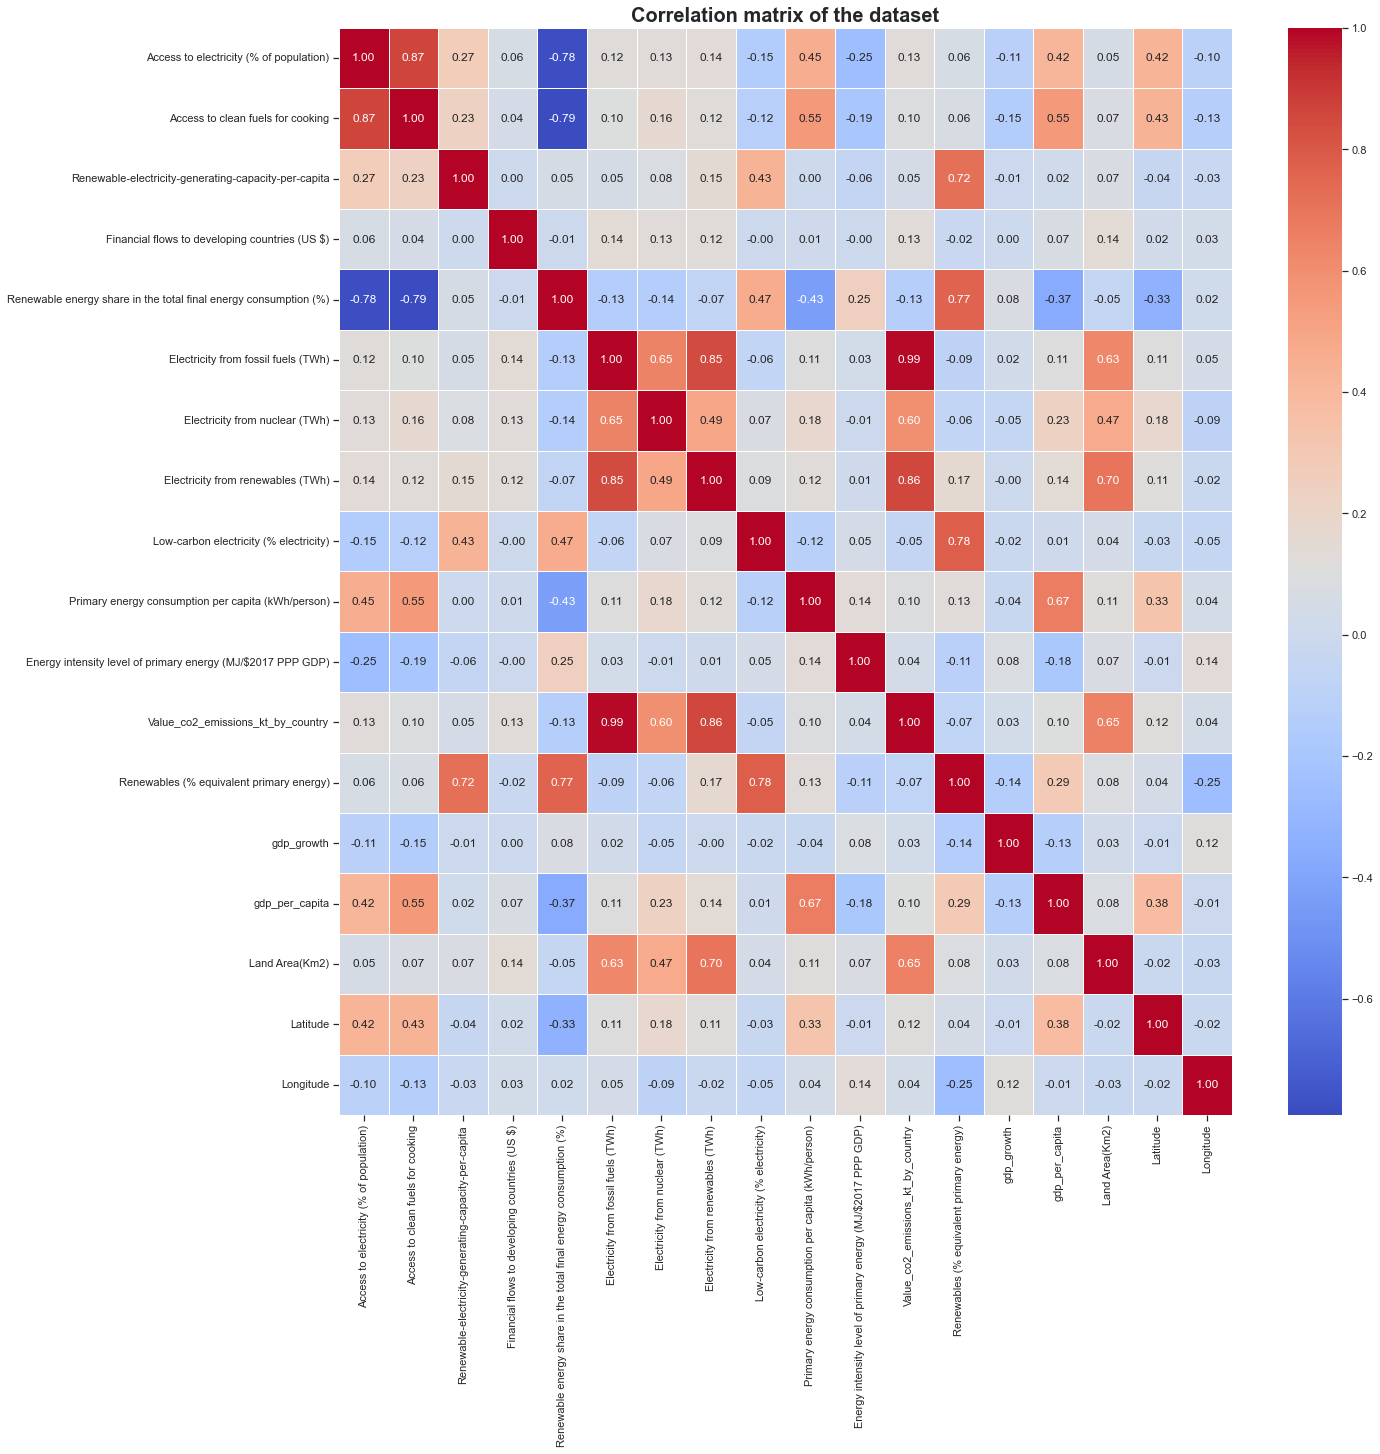

In [3]:
plt.figure(figsize=(20,20))

corr_matrix = df.iloc[:, 2:21].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix of the dataset", fontsize=20, fontweight="bold")
plt.savefig("../img/correlation_matrix.png", dpi=200, bbox_inches="tight")

We can clearly see that some features are highly corrolated to each other but other are not. For instance the `Financial flow to developing countries (US$)` has only poor correlation with all other features. It would be hard to predict this feature based on the other ones. This is the same for the `gdp_growth`, `Longitude`, `Energy intensity level of primary energy` features. It could have been interesting to work with these features but we will not use them for the project.

An interesting thing to note is that the `Latitude` feature is quite positively well corrolated with the `Access to electricity` and `Access to clean fuels for cooking` features. This means that the more you go to the north, the more you have access to electricity and clean fuels for cooking. This is not surprising since the north is more developed than the south (look also for the `gdp_per_capita` correlation score). This is also the case for the  `Primary energy consumption par capita` feature. Northern countries consume more energy than southern ones. They tend to have a higher impact on climate change than southern countries.

Now, we can set an objective for the project. We would like to predict: 

- The CO2 emissions
- Primary energy consumption per capita

These are mainly regression problems.

Predicting the percentage of Renewables energy as primary energy could have been also interesting to do but the response feature is so poorly filled that we can't use it as a response feature (cf the [dataset description notebook](./dataset_description.ipynb)).

### 2. Feature selection

#### Selection for the CO2 emissions prediction

Looking at the heatmap, we can clearly see that a relationship exists between some factors and the response (`Value_co2_emissions_kt_by_country`). Taking a threshold of 0.5 for the correlation score will make us takinng important feature to compute a regression after that. 

In [4]:
co2_cols_to_keep = [column for column in corr_matrix.columns if abs(corr_matrix.loc['Value_co2_emissions_kt_by_country', column]) > 0.5]
co2_cols_to_keep

['Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Value_co2_emissions_kt_by_country',
 'Land Area(Km2)']

In [5]:
df_co2 = df[['Entity', 'Year'] + co2_cols_to_keep]
df_co2

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Value_co2_emissions_kt_by_country,Land Area(Km2)
0,Afghanistan,2000,0.16,0.0,0.31,760.000000,652230.0
1,Afghanistan,2001,0.09,0.0,0.50,730.000000,652230.0
2,Afghanistan,2002,0.13,0.0,0.56,1029.999971,652230.0
3,Afghanistan,2003,0.31,0.0,0.63,1220.000029,652230.0
4,Afghanistan,2004,0.33,0.0,0.56,1029.999971,652230.0
...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,3.50,0.0,3.32,11020.000460,390757.0
3645,Zimbabwe,2017,3.05,0.0,4.30,10340.000150,390757.0
3646,Zimbabwe,2018,3.73,0.0,5.46,12380.000110,390757.0
3647,Zimbabwe,2019,3.66,0.0,4.58,11760.000230,390757.0


For this dataset, we will have:

| Features | Factors | Response |
| ----------------- | :---------: | :---------: |
| Year                                                              | | |
| Electricity from fossil fuels (TWh)                               | X | |
| Electricity from nuclear (TWh)                                    | X | |
| Electricity from renewables (TWh)                                 | X | |
| Land Area (Km2)                                                   | X | | |
| Value_co2_emissions_kt_by_country                                 | | X |

Remember also that according to the [dataset description](./dataset_description.ipynb), the `Value_co2_emissions_kt_by_country` has some missing values that we will have to deal with (drop rows or impute values).

#### Selection for the Primary energy consumption per capita

In [6]:
pe_cols_to_keep = [column for column in corr_matrix.columns if abs(corr_matrix.loc['Primary energy consumption per capita (kWh/person)', column]) > 0.4]
pe_cols_to_keep

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Primary energy consumption per capita (kWh/person)',
 'gdp_per_capita']

In [7]:
df_pe = df[['Entity', 'Year'] + pe_cols_to_keep]
df_pe

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Primary energy consumption per capita (kWh/person),gdp_per_capita
0,Afghanistan,2000,1.613591,6.2,44.99,302.59482,NaN
1,Afghanistan,2001,4.074574,7.2,45.60,236.89185,NaN
2,Afghanistan,2002,9.409158,8.2,37.83,210.86215,179.426579
3,Afghanistan,2003,14.738506,9.5,36.66,229.96822,190.683814
4,Afghanistan,2004,20.064968,10.9,44.24,204.23125,211.382074
...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,81.90,3227.68020,1464.588957
3645,Zimbabwe,2017,44.178635,29.8,82.46,3068.01150,1235.189032
3646,Zimbabwe,2018,45.572647,29.9,80.23,3441.98580,1254.642265
3647,Zimbabwe,2019,46.781475,30.1,81.50,3003.65530,1316.740657


For this dataset, we will have:

| Features | Factors | Response |
| ----------------- | :---------: | :---------: |
| Year                                                              | | |
| Access to electricity (% of population)                           | X | |
| Access to clean fuels for cooking                                 | X | |
| Renewable energy share in the total final energy consumption (%)  | X | |
| Primary energy consumption per capita (kWh/person)                | | X |
| GDP per capita                                                    | X | |

### 3. Higher dimension relationship

#### CO2 emissions prediction

In [8]:
# This prints the number of rows with at least one missing value
df_co2.shape[0] - df_co2.dropna().shape[0]

548

This dataset does not contain a lot of missing values. If we drop rows that are containing we still have more than 3000 samples to train our model. As we have 5 features, this number if samples is sufficient to train a regression model. There is no need of finding higher dimensional relationship. 

#### Renewable energy consumption prediction

In [9]:
df_pe.shape[0] - df_pe.dropna().shape[0]

622

Same result are the CO2 emission dataset: even though we drop all the rows contaning missing values, we still have around 3000 samples to train our model. This is sufficient for a regression model with 5 features.

## Feature Sampling (Question 2 of the Homework)

To have a better distribution, we'll normalize our data.

In [10]:
def normalizeDataFrame(df):
    return (df - df.mean()) / df.std()

### CO2 emissions prediction

In [11]:
normalized_df_co2 = normalizeDataFrame(df_co2.iloc[:, 2:])
normalized_df_co2

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Value_co2_emissions_kt_by_country,Land Area(Km2)
0,-0.201708,-0.184232,-0.226542,-0.205654,0.011994
1,-0.201910,-0.184232,-0.224722,-0.205693,0.011994
2,-0.201795,-0.184232,-0.224148,-0.205305,0.011994
3,-0.201277,-0.184232,-0.223478,-0.205059,0.011994
4,-0.201220,-0.184232,-0.224148,-0.205305,0.011994
...,...,...,...,...,...
3644,-0.192112,-0.184232,-0.197719,-0.192392,-0.152919
3645,-0.193405,-0.184232,-0.188335,-0.193271,-0.152919
3646,-0.191451,-0.184232,-0.177227,-0.190634,-0.152919
3647,-0.191652,-0.184232,-0.185654,-0.191436,-0.152919


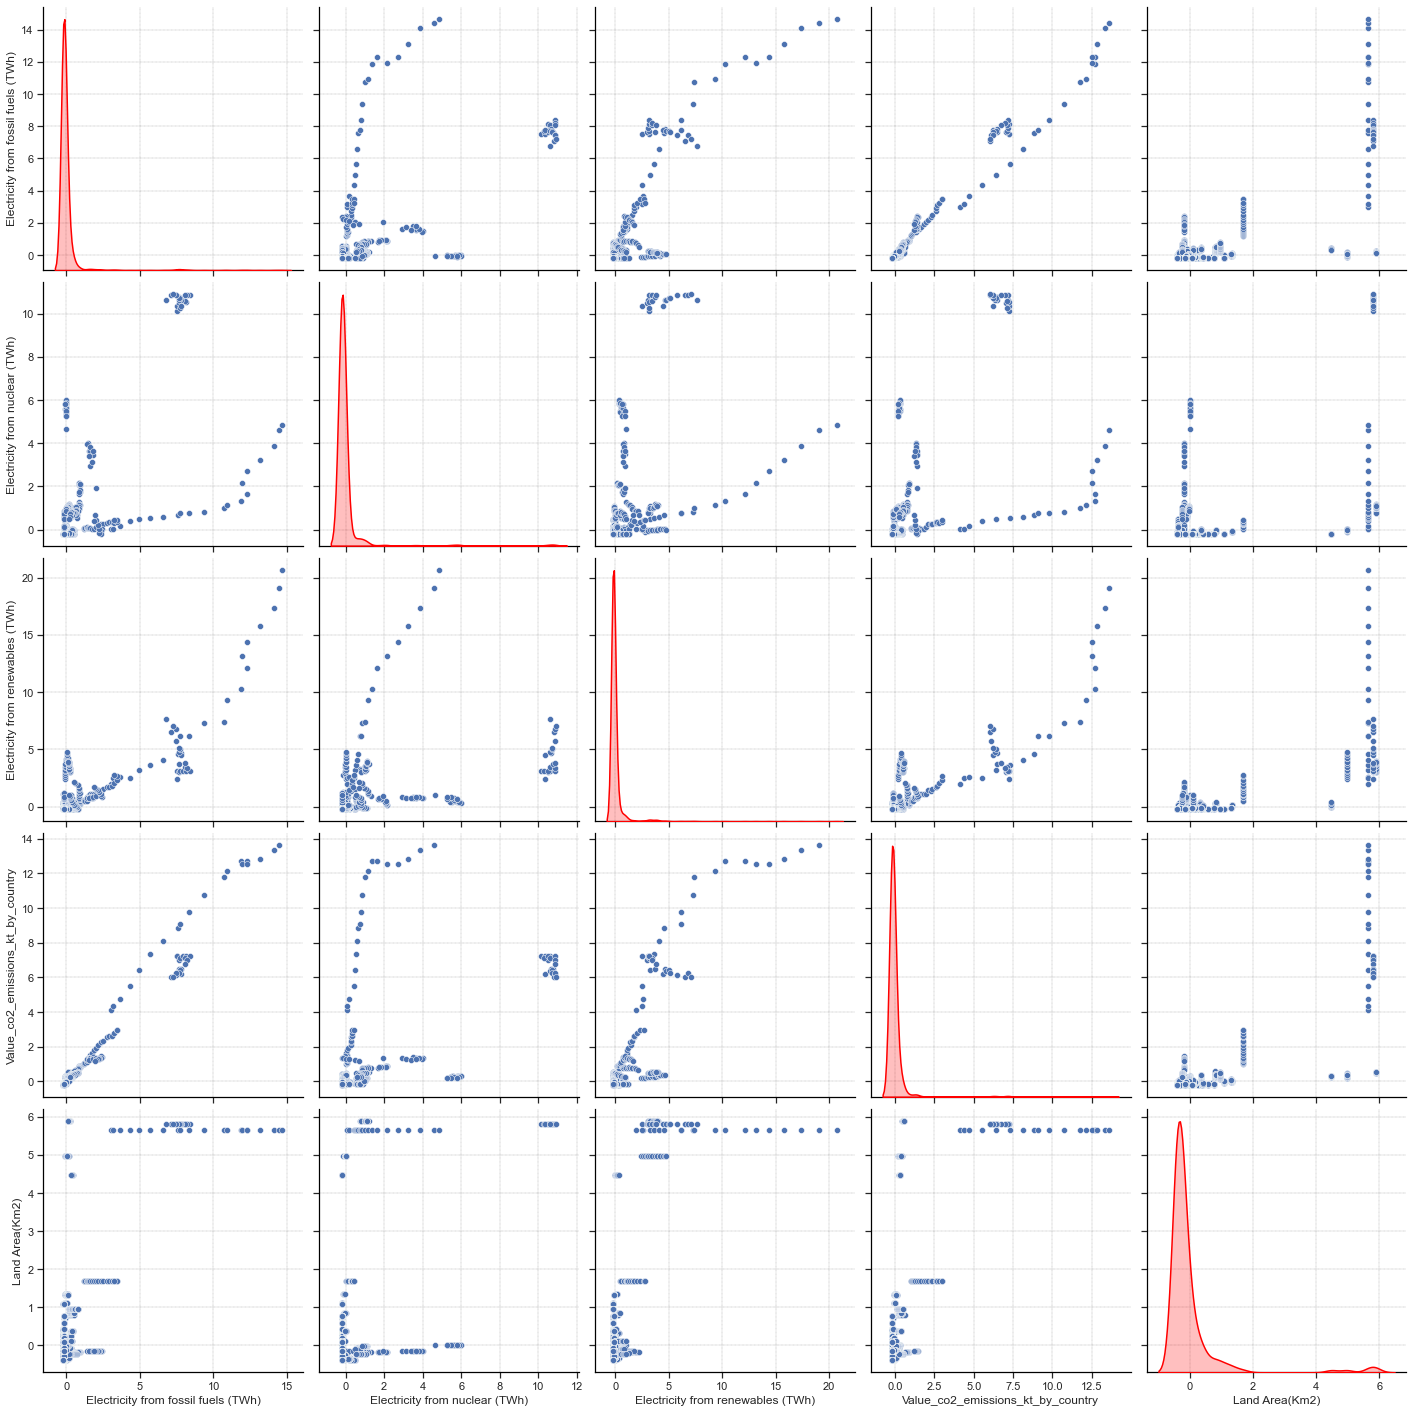

In [12]:
sns.pairplot(normalized_df_co2, height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})

We can clearly see correlations on scatter plot between features. For feature distribution, is hard to see because countries that are emitting a lot of CO2 are so few compared to those who are not. Computing logarithmic values of the dataset could be a possibility but many samples have 0 as value for the `Electricity from nuclear (TWh)` feature. As $log(0)$ is not defined, we can't use this method. Let's try to remove some outliers.

(3059, 5)


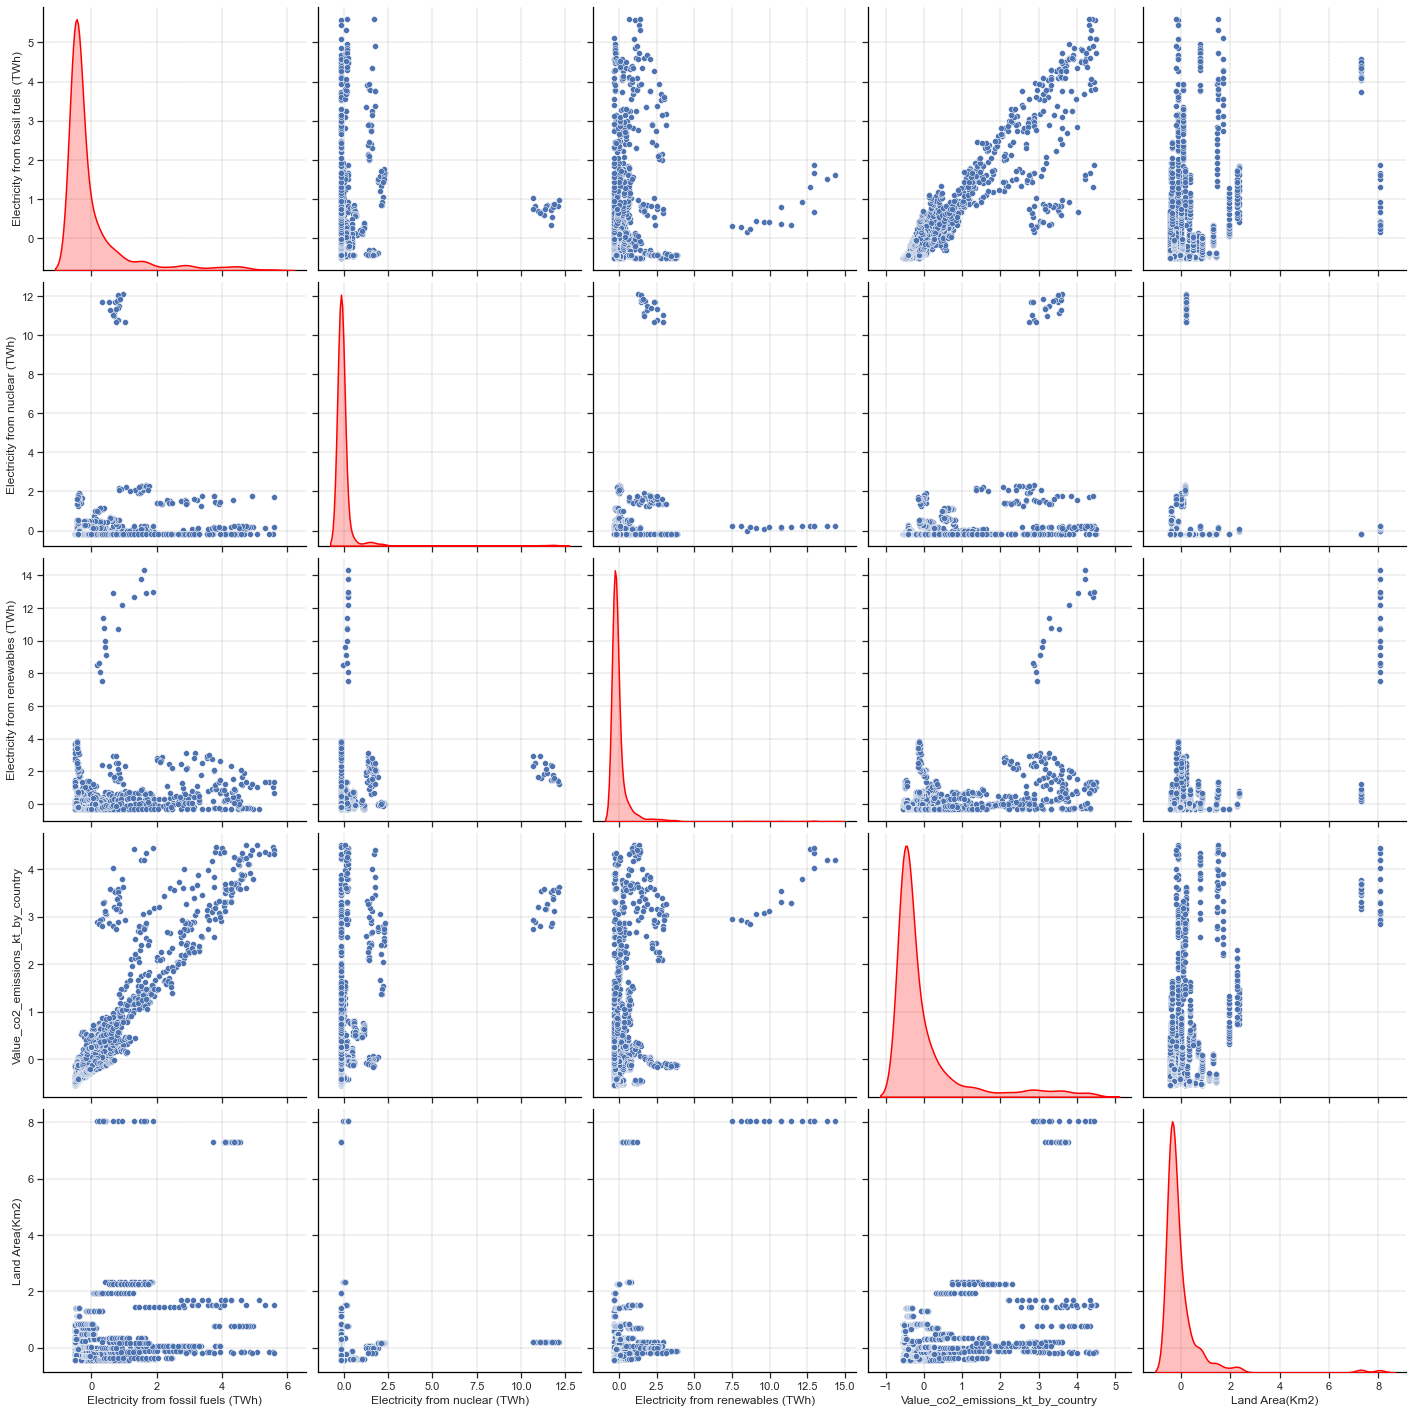

In [13]:
top_outliers_co2 = df_co2['Value_co2_emissions_kt_by_country'].quantile(0.95)

normalized_df_co2_2 = normalizeDataFrame(df_co2[df_co2['Value_co2_emissions_kt_by_country'] < top_outliers_co2].iloc[:, 2:])

print(normalized_df_co2_2.shape)

sns.pairplot(normalized_df_co2_2, height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})
plt.savefig("../img/pairplot_co2.png", dpi=200, bbox_inches="tight")

This is better ! We still have enough samples to train our model and it might seems that the response feature is following a **Weibull** or **Log-normal** distribution.

### Primary energy consumption per capita

In [14]:
normalized_df_pe = normalizeDataFrame(df_pe.iloc[:, 2:])
normalized_df_pe

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Primary energy consumption per capita (kWh/person),gdp_per_capita
0,-2.553880,-1.461320,0.413175,-0.731637,NaN
1,-2.472594,-1.435708,0.433580,-0.733527,NaN
2,-2.296393,-1.410096,0.173670,-0.734275,-0.664862
3,-2.120365,-1.376799,0.134532,-0.733726,-0.664291
4,-1.944432,-1.340942,0.388087,-0.734466,-0.663241
...,...,...,...,...,...
3644,-1.201365,-0.856869,1.647834,-0.647518,-0.599658
3645,-1.147959,-0.856869,1.666566,-0.652110,-0.611297
3646,-1.101914,-0.854307,1.591972,-0.641355,-0.610310
3647,-1.061987,-0.849185,1.634454,-0.653961,-0.607160


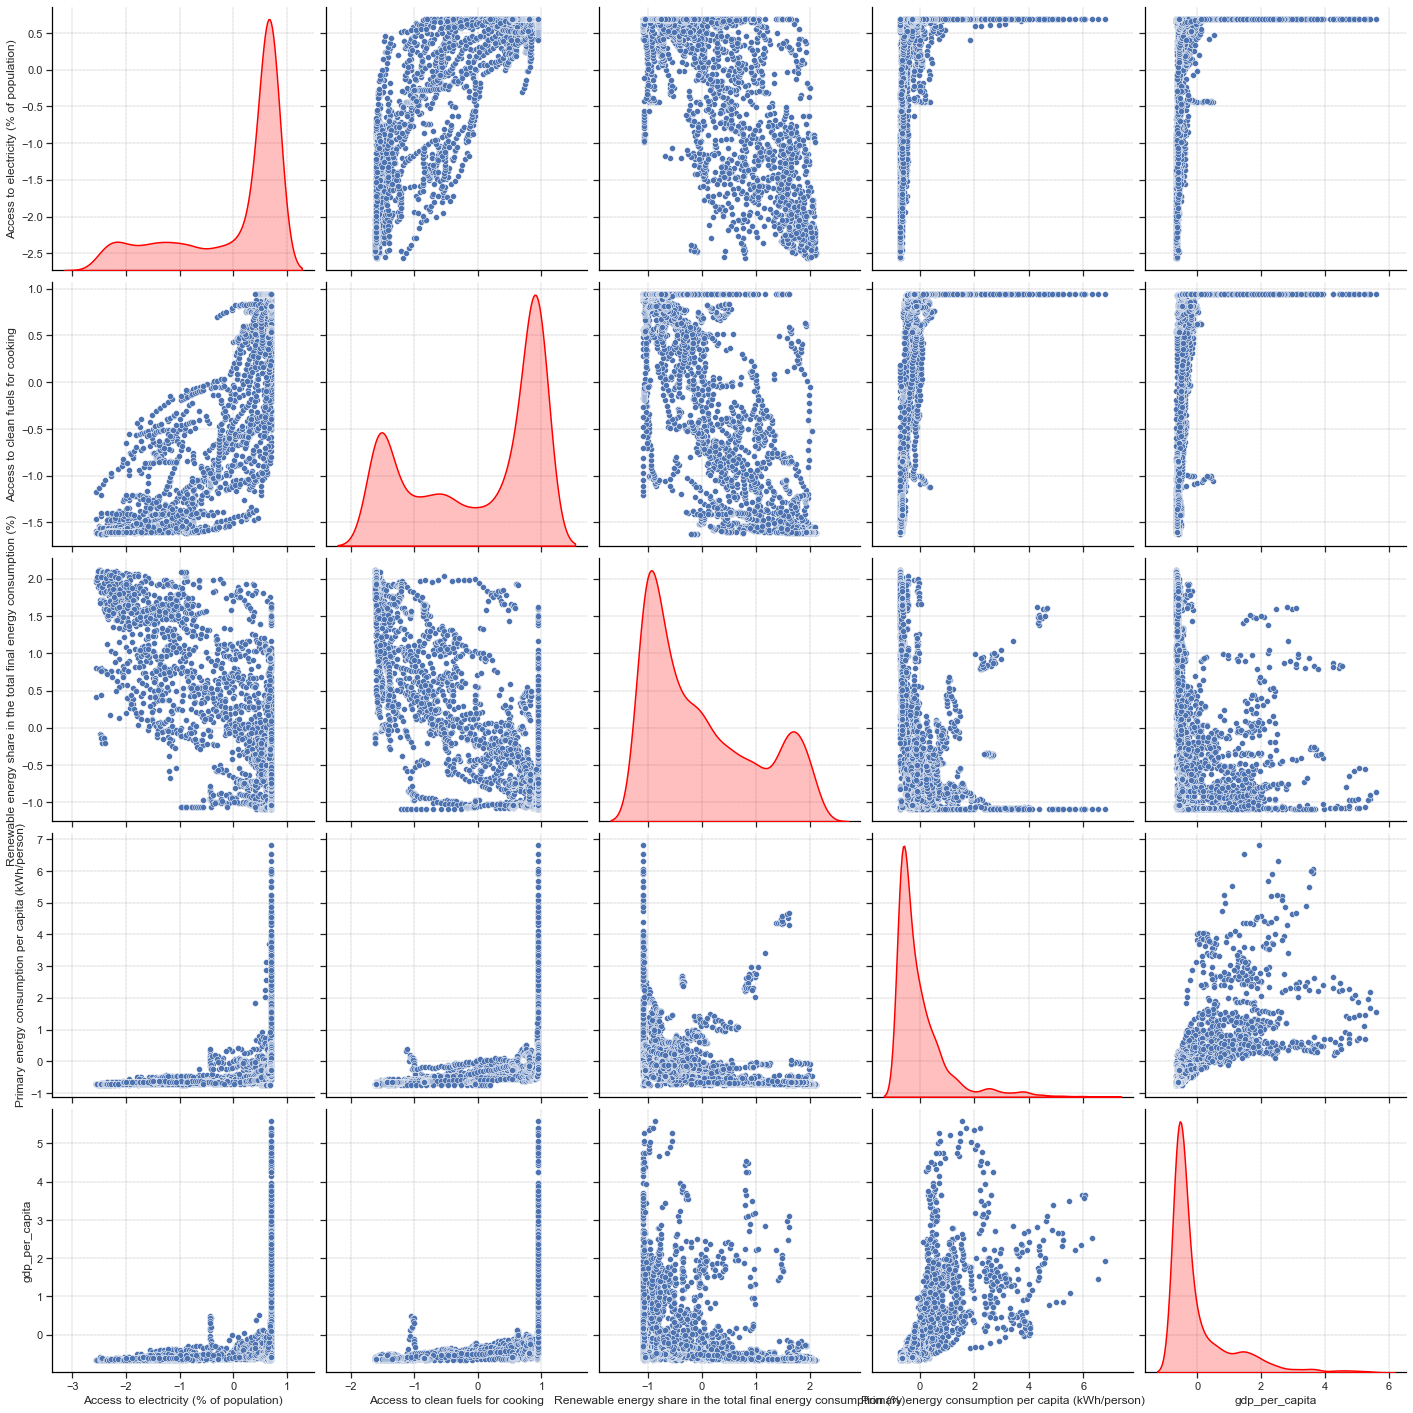

In [15]:
sns.pairplot(normalized_df_pe, height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})

For this problem, it is easier to see that all the input features are well distributed. However, it is a bit more difficult to see that for the response feature. We can try to remove some outliers to have a better distribution.

(3466, 5)


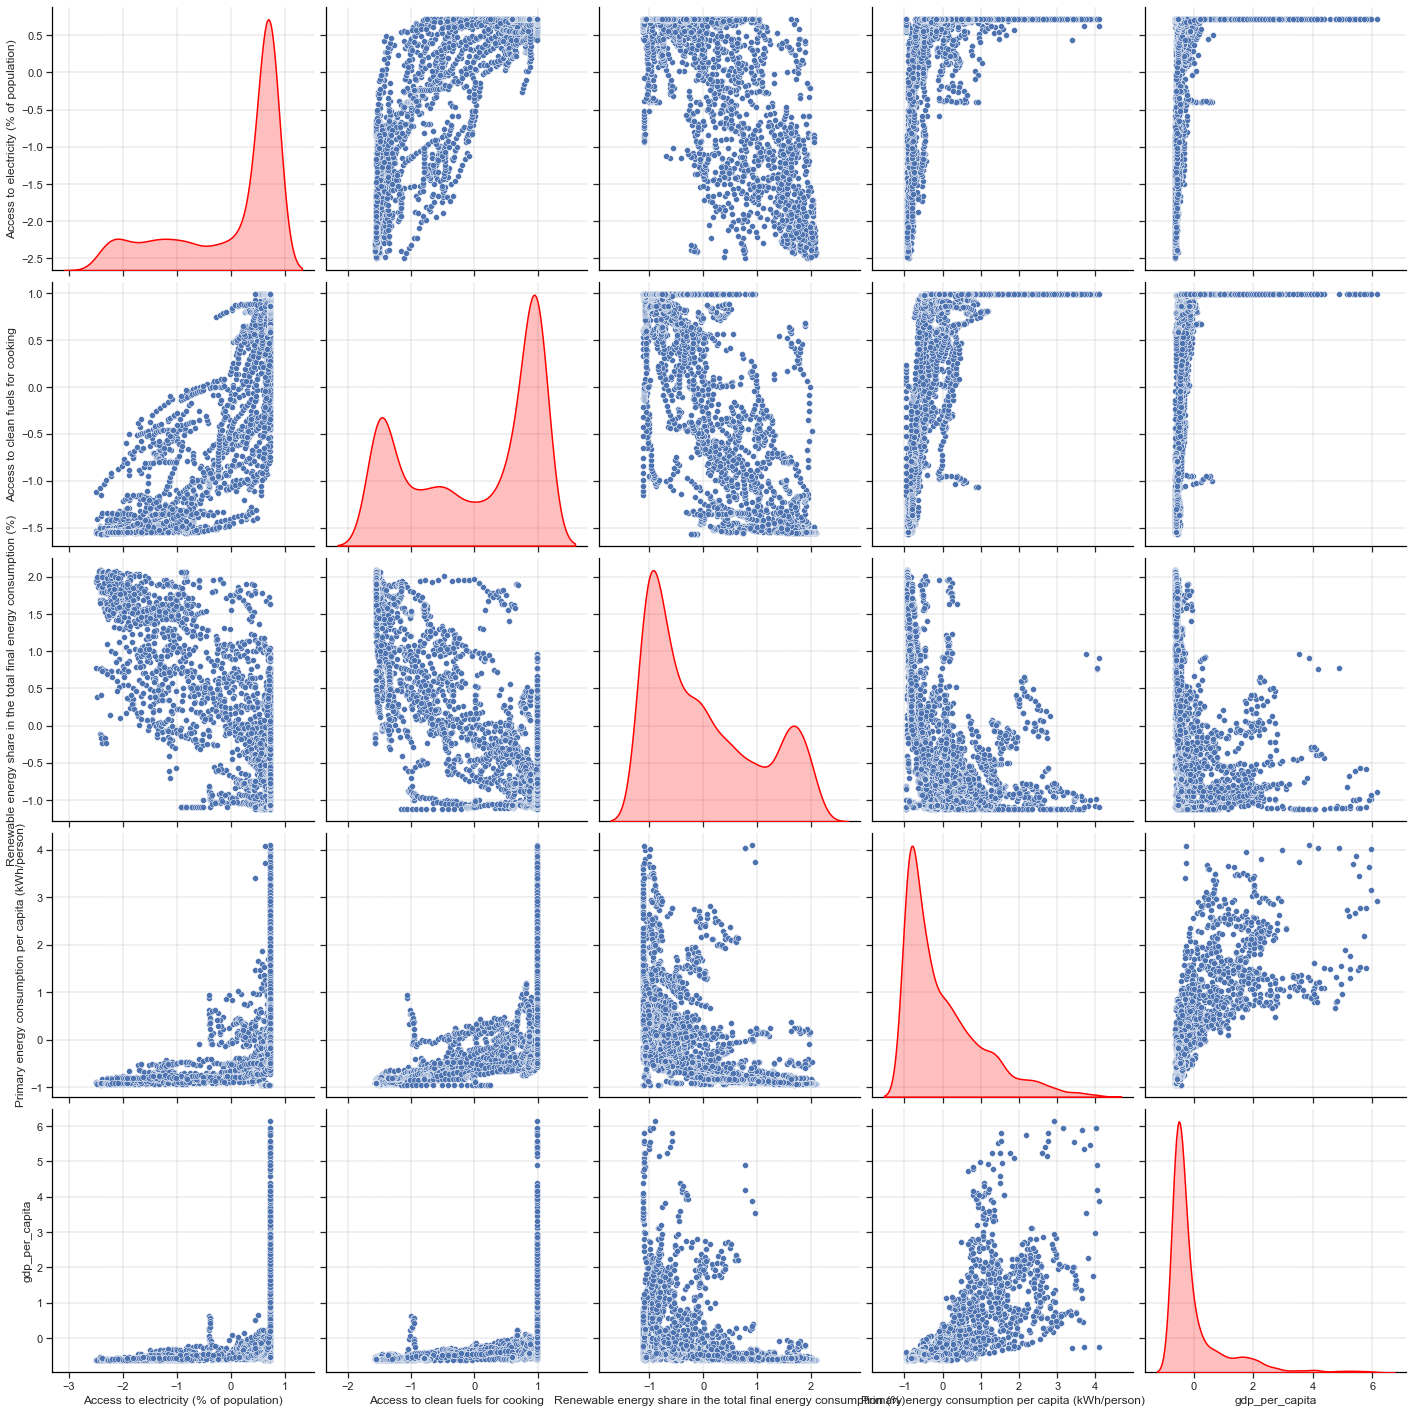

In [16]:
top_outliers_pe = df_pe['Primary energy consumption per capita (kWh/person)'].quantile(0.95)

normalized_df_pe_2 = normalizeDataFrame(df_pe[df_pe['Primary energy consumption per capita (kWh/person)'] < top_outliers_pe].iloc[:, 2:])

print(normalized_df_pe_2.shape)

sns.pairplot(normalized_df_pe_2, height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})
plt.savefig("../img/pairplot_pe.png", dpi=200, bbox_inches="tight")

Only by removing 5% of the outliers, we can see that the distribution of the response feature is better ! Moreover, the shape of this distribution looks like a **Log-normal distribution**.